# TASK- I (10 Marks) Extract the recent 500 posts information from Hacker News website (https://news.ycombinator.com/newest) and save the following to a dataframe as columns:

TASK- I (10 Marks)
Extract the recent 500 posts information from Hacker News website
(https://news.ycombinator.com/newest) and save the following to a dataframe as columns: (10M)
● Title : title of the post
● date_created : date and time the post was made
● posted_by_user : name of the account that made the post
● url : url of the post
● domain : domain like github.com, medium.com etc
● num_upvotes : number of upvotes the post received
● num_comments : number of comments the post received


In [0]:
import urllib.request as url
import re
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np

import random
random.seed(123)

Extracting multiple pages from web and finding link for that and creating loop for that

In [0]:
list1 = []
link_newest = "https://news.ycombinator.com/"
for i in range(1,22):
  if i == 1:
    link1="https://news.ycombinator.com/newest"
    list1.append(link1)
  else:
    link1 = link_newest + add
    list1.append(link1)
  print(link1)
  soup= bs(url.urlopen(link1))
  for link in soup.find_all('a'):
    if len(link.text.strip()) > 1 and re.match('More',link.text):
        add = link['href']



https://news.ycombinator.com/newest
https://news.ycombinator.com/newest?next=21760619&n=31
https://news.ycombinator.com/newest?next=21760318&n=61
https://news.ycombinator.com/newest?next=21760021&n=91
https://news.ycombinator.com/newest?next=21759679&n=121
https://news.ycombinator.com/newest?next=21759255&n=151
https://news.ycombinator.com/newest?next=21758796&n=181
https://news.ycombinator.com/newest?next=21758494&n=211
https://news.ycombinator.com/newest?next=21758102&n=241
https://news.ycombinator.com/newest?next=21757829&n=271
https://news.ycombinator.com/newest?next=21757603&n=301
https://news.ycombinator.com/newest?next=21757239&n=331
https://news.ycombinator.com/newest?next=21756864&n=361
https://news.ycombinator.com/newest?next=21756533&n=391
https://news.ycombinator.com/newest?next=21756306&n=421
https://news.ycombinator.com/newest?next=21756008&n=451
https://news.ycombinator.com/newest?next=21755710&n=481
https://news.ycombinator.com/newest?next=21755408&n=511
https://news.yc

In [0]:
list1

['https://news.ycombinator.com/newest',
 'https://news.ycombinator.com/newest?next=21760619&n=31',
 'https://news.ycombinator.com/newest?next=21760318&n=61',
 'https://news.ycombinator.com/newest?next=21760021&n=91',
 'https://news.ycombinator.com/newest?next=21759679&n=121',
 'https://news.ycombinator.com/newest?next=21759255&n=151',
 'https://news.ycombinator.com/newest?next=21758796&n=181',
 'https://news.ycombinator.com/newest?next=21758494&n=211',
 'https://news.ycombinator.com/newest?next=21758102&n=241',
 'https://news.ycombinator.com/newest?next=21757829&n=271',
 'https://news.ycombinator.com/newest?next=21757603&n=301',
 'https://news.ycombinator.com/newest?next=21757239&n=331',
 'https://news.ycombinator.com/newest?next=21756864&n=361',
 'https://news.ycombinator.com/newest?next=21756533&n=391',
 'https://news.ycombinator.com/newest?next=21756306&n=421',
 'https://news.ycombinator.com/newest?next=21756008&n=451',
 'https://news.ycombinator.com/newest?next=21755710&n=481',
 'h

Creating Function for extracting data by using url


In [0]:
def extract_web(link):
    html = url.urlopen(link).read()
    soup = bs(html,'html.parser')
    d={'title':[],'domain':[],'url':[],'date_created':[],'num_upvotes':[],'num_comments':[],'posted_by_user':[]}
    for i in soup.find_all('td',class_='title')[1::2]:
        try:
            d['title'].append(i.text)
        except:
            d['title'].append('missing')
        try:
            d['domain'].append(i.span.text)
        except:
            d['domain'].append('missing')
        try:
            d['url'].append(i.a['href'])
        except:
            d['url'].append('missing')
    for l in soup.find_all('td',class_='subtext'):
        try:
            d['num_upvotes'].append(l.span.text)
        except:
            d['num_upvotes'].append('missing')
        try:
            d['date_created'].append(l.find_all('a')[1].text)
        except:
            d['date_created'].append('missing')
        try:
            d['num_comments'].append(l.find_all('a')[-1].text)
        except:
            d['num_comments'].append('missing')
        try:
            d['posted_by_user'].append(l.a.text)
        except:
            d['posted_by_user'].append('missing')
    return pd.DataFrame(d)
    

In [0]:
extract_web

extracting text from url 

# Task 2 :For each url, extract the full article from its respective website.
# Add this as a new column to the same dataframe created in the above task.
# Note: You may ignore the website articles which require dynamic webscraping for now.
# You need to document the reason in case if you’ve failed to collect the data for any website.

In [0]:
def extract_para(i):
    para =[]
    try:
        html = url.urlopen(i).read()
        soup = bs(html,'html.parser')
        for j in soup.find_all('p'):
            para.append(j.text)
        return(" ".join(para))
    except:
        para.append('Website is not giving access')
        return para[0]

In [0]:
a=[]
for i in list1:
    a.append(extract_web(i))
temp=pd.concat(a,ignore_index=True)

In [0]:
a

[                                                title  ...   posted_by_user
 0                                      Lead Recruiter  ...     viralchauhan
 1   Communications device offers bandwidth potenti...  ...  peter_d_sherman
 2   Debugging Splunk App/Add-On Using Python Debug...  ...        khushbu_m
 3               Elon Musk: Man of the Year (ciol.com)  ...          aspen97
 4   Hotstar's India Watch Report 2019[pdf] (hotsta...  ...         manojlds
 5   Best Macbook Pro 16 alternatives (search tool)...  ...           imohds
 6   How to perform exception handling in Python wi...  ...        khushbu_m
 7   Twitter will preserve JPEGs as they are encode...  ...      el_duderino
 8   UK General election Ads are 'indecent, dishone...  ...         strainer
 9        “Link In Bio” is a slow knife (anildash.com)  ...     rahuldottech
 10         Portal (Interactive Novel) (wikipedia.org)  ...  peter_d_sherman
 11  US senators threaten Apple with encryption reg...  ...       LogicRiver

In [0]:
temp['text'] = temp['url'].apply(extract_para)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Dataframe with text and columns


In [0]:
temp
    

,title,domain,url,date_created,num_upvotes,num_comments,posted_by_user,text
0,Working with Azure Application Insights in You...,(react.christmas),https://react.christmas/2019/11,2 minutes ago,1 point,discuss,selbekk,A 4 minute read written bySondre Widmark and M...
1,A universal tech code of conduct (parkersoftwa...,(parkersoftware.com),https://www.parkersoftware.com/blog/a-universa...,3 minutes ago,3 points,discuss,roxyabercrombie,Don’t make technical assumptions. Don’t back-s...
2,Scolp: Streaming Column Printer for Python (Ne...,(github.com),https://github.com/davidohana/python-scolp,4 minutes ago,1 point,discuss,davidoh,GitHub is home to over 40 million developers w...
3,Thinking in React Hooks (wattenberger.com),(wattenberger.com),https://wattenberger.com/blog/react-hooks,5 minutes ago,1 point,discuss,mariuz,
4,Startup School Winter 2020 (ycombinator.com),(ycombinator.com),https://blog.ycombinator.com/announcing-startu...,7 minutes ago,2 points,discuss,bithavoc,Website is not giving access
...,...,...,...,...,...,...,...,...
625,Apple Mac Pro Available to Buy (apple.com),(apple.com),https://www.apple.com/shop/buy-mac/mac-pro,16 hours ago,115 points,212 comments,FireBeyond,"More ways to shop: Visit an Apple Store, call ..."
626,Internationalization in Angular v9 with angula...,(ninja-squad.com),https://blog.ninja-squad.com/2019/12/10/angula...,16 hours ago,2 points,discuss,ninjasquad,Some great progress has been made on the i18n ...
627,How to Make 1b from a Single Product in Nigeri...,(medium.com),https://medium.com/@drola/how-to-make-1bn-from...,16 hours ago,2 points,discuss,calebmontiveros,Website is not giving access
628,Why Python? (linuxjournal.com),(linuxjournal.com),https://www.linuxjournal.com/article/3882,16 hours ago,3 points,discuss,dheepakg,"My first look at Python was an accident,\nand ..."


In [0]:
temp.to_csv('text.csv',index=False)

# TASK-III (10 Marks)
# i. Perform Topic Modelling on the collected text articles. (5 Marks)
# ii. Name the topics based on your understanding. (2 Marks)
# iii. Display the top 3 article titles for each topic. (3 Marks)


In [0]:
temp['text'][2]

'GitHub is home to over 40 million developers working together to host and review code, manage projects, and build software together. \n              Use Git or checkout with SVN using the web URL.\n             \n              Want to be notified of new releases in\n              davidohana/python-scolp?\n             If nothing happens, download GitHub Desktop and try again. Go back If nothing happens, download GitHub Desktop and try again. Go back If nothing happens, download Xcode and try again. Go back If nothing happens, download the GitHub extension for Visual Studio and try again. Go back Scolp is Streaming Column Printer for Python 3.6 or later. Scolp let you easily pretty-print masses of tabular data in a streaming fashion - each value is printed when available, without waiting for end of data. It is perfect for apps that need to print progress reports in columns. Main features: Auto-adjusting column width according to the largest value so far or column header width. Control 

In [0]:
temp['text']=[text.strip().lower() for text in temp['text']]

In [0]:
temp['text'][2]

'github is home to over 40 million developers working together to host and review code, manage projects, and build software together. \n              use git or checkout with svn using the web url.\n             \n              want to be notified of new releases in\n              davidohana/python-scolp?\n             if nothing happens, download github desktop and try again. go back if nothing happens, download github desktop and try again. go back if nothing happens, download xcode and try again. go back if nothing happens, download the github extension for visual studio and try again. go back scolp is streaming column printer for python 3.6 or later. scolp let you easily pretty-print masses of tabular data in a streaming fashion - each value is printed when available, without waiting for end of data. it is perfect for apps that need to print progress reports in columns. main features: auto-adjusting column width according to the largest value so far or column header width. control 

In [0]:
re.sub('’', "", temp['text'][2])

'github is home to over 40 million developers working together to host and review code, manage projects, and build software together. \n              use git or checkout with svn using the web url.\n             \n              want to be notified of new releases in\n              davidohana/python-scolp?\n             if nothing happens, download github desktop and try again. go back if nothing happens, download github desktop and try again. go back if nothing happens, download xcode and try again. go back if nothing happens, download the github extension for visual studio and try again. go back scolp is streaming column printer for python 3.6 or later. scolp let you easily pretty-print masses of tabular data in a streaming fashion - each value is printed when available, without waiting for end of data. it is perfect for apps that need to print progress reports in columns. main features: auto-adjusting column width according to the largest value so far or column header width. control 

In [0]:
data=temp.copy()

In [0]:
##function for removing all sysmbols 

In [0]:
def scrub_words(text):
    text = re.sub('’', "'", text)
    
    text = re.sub('\xa0', ' ', text)
    
    
    text = re.sub("(\\W|\\d)",' ',text)
    
   
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    
    text = re.sub("<.*?>", ' ', text)
    
  
    text = re.sub("\s+", ' ', text)
    return text

In [0]:
data['text'] = [scrub_words(text) for text in data['text']]

In [0]:
data['text'][2]

'github is home to over million developers working together to host and review code manage projects and build software together use git or checkout with svn using the web url want to be notified of new releases in davidohana python scolp if nothing happens download github desktop and try again go back if nothing happens download github desktop and try again go back if nothing happens download xcode and try again go back if nothing happens download the github extension for visual studio and try again go back scolp is streaming column printer for python or later scolp let you easily pretty print masses of tabular data in a streaming fashion each value is printed when available without waiting for end of data it is perfect for apps that need to print progress reports in columns main features auto adjusting column width according to the largest value so far or column header width control verbosity of printing by control format of printed values by control alignment of printed values contro

In [0]:
temp['text'][2]

'github is home to over 40 million developers working together to host and review code, manage projects, and build software together. \n              use git or checkout with svn using the web url.\n             \n              want to be notified of new releases in\n              davidohana/python-scolp?\n             if nothing happens, download github desktop and try again. go back if nothing happens, download github desktop and try again. go back if nothing happens, download xcode and try again. go back if nothing happens, download the github extension for visual studio and try again. go back scolp is streaming column printer for python 3.6 or later. scolp let you easily pretty-print masses of tabular data in a streaming fashion - each value is printed when available, without waiting for end of data. it is perfect for apps that need to print progress reports in columns. main features: auto-adjusting column width according to the largest value so far or column header width. control 

In [0]:
print("Data Type: ", type(temp['text']))
print("Data Type: ", type(data['text']))

print("Length of data: ", len(temp['text']))
print("Length of data: ", len(data['text']))

print("Original data: \n", temp['text'][2])
print("\n\n**************************************************************************\n\n")
print("Clean data: \n", data['text'][2])

Data Type:  <class 'pandas.core.series.Series'>
Data Type:  <class 'pandas.core.series.Series'>
Length of data:  630
Length of data:  630
Original data: 
 github is home to over 40 million developers working together to host and review code, manage projects, and build software together. 
              use git or checkout with svn using the web url.
             
              want to be notified of new releases in
              davidohana/python-scolp?
             if nothing happens, download github desktop and try again. go back if nothing happens, download github desktop and try again. go back if nothing happens, download xcode and try again. go back if nothing happens, download the github extension for visual studio and try again. go back scolp is streaming column printer for python 3.6 or later. scolp let you easily pretty-print masses of tabular data in a streaming fashion - each value is printed when available, without waiting for end of data. it is perfect for apps that need to

In [0]:
data['word_count'] = [len(text.split(' ')) for text in data['text']]
pd.DataFrame(data['word_count']).describe()

,word_count
count,630.000000
mean,786.546032
std,1171.112462
min,1.000000
25%,5.000000
50%,441.000000
75%,1035.250000
max,9578.000000


In [0]:
data.head(2)

,title,domain,url,date_created,num_upvotes,num_comments,posted_by_user,text,word_count
0,Working with Azure Application Insights in You...,(react.christmas),https://react.christmas/2019/11,2 minutes ago,1 point,discuss,selbekk,a minute read written bysondre widmark and mar...,781
1,A universal tech code of conduct (parkersoftwa...,(parkersoftware.com),https://www.parkersoftware.com/blog/a-universa...,3 minutes ago,3 points,discuss,roxyabercrombie,don t make technical assumptions don t back se...,757


In [0]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

function for tokenize stemming and stopwords

In [0]:
def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]

    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    lemma = [t.lemma_ for t in filtered_tokens]
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [0]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [0]:
# !pip install nltk
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer

converting text in to nlp objects for pre-processing 

In [0]:
data['newtext'] = data['text'].apply(nlp)

In [0]:
data['newtext'][1]

don t make technical assumptions don t back seat develop don t be a know it all don t sweat the non software stuff these are the universal rules of the tech world when followed everyone benefits junior developer to cto here s why we need a tech code of conduct and how each of these rules help create a positive programming environment with more collaborative spark less snark any tech team is likely to be filled with an eclectic range of skill levels specialities and experience drew earned programming chops through formal education charlie hacked away at home to produce an employable portfolio and that s fine welcome even a mixed team provides a great opportunity for developers to share knowledge and understanding however it also opens the opportunity to make incorrect tech assumptions about what a team member knows or doesn t when this happens communication can break down and important questions go unasked assuming someone knows something can also lead to embarrassment for example drew 

In [0]:
data['tokens']=[token.text for token in data['newtext']] 

In [0]:
data.newtext.head(2)

0    (a, minute, read, written, bysondre, widmark, ...
1    (don, t, make, technical, assumptions, don, t,...
Name: newtext, dtype: object

In [0]:
from spacy.lang.en.stop_words import STOP_WORDS

Function for tokenize_and_stem

In [0]:
def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]

    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [0]:
 data['tokenize_and_stem']=data['newtext'].apply(tokenize_and_stem)

In [0]:
data['tokenize_and_stem'].head(5)

0    [minut, read, written, bysondr, widmark, mari,...
1    [don, t, technic, assumpt, don, t, seat, devel...
2    [github, home, million, develop, work, host, r...
3                                                   []
4                               [websit, give, access]
Name: tokenize_and_stem, dtype: object

function for tokenize_and_lemmatize

In [0]:
def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    lemma = [t.lemma_ for t in filtered_tokens]
    return lemma

In [0]:
 data['tokenize_and_lemmatize']=data['newtext'].apply(tokenize_and_lemmatize)

In [0]:
data.head(5)

,title,domain,url,date_created,num_upvotes,num_comments,posted_by_user,text,word_count,newtext,tokens,stopwordremoves,tokenize_and_stem,tokenize_and_lemmatize
0,Working with Azure Application Insights in You...,(react.christmas),https://react.christmas/2019/11,2 minutes ago,1 point,discuss,selbekk,a minute read written bysondre widmark and mar...,781,"(a, minute, read, written, bysondre, widmark, ...",a minute read written bysondre widmark and mar...,None,"[minut, read, written, bysondr, widmark, mari,...","[minute, read, write, bysondre, widmark, marie..."
1,A universal tech code of conduct (parkersoftwa...,(parkersoftware.com),https://www.parkersoftware.com/blog/a-universa...,3 minutes ago,3 points,discuss,roxyabercrombie,don t make technical assumptions don t back se...,757,"(don, t, make, technical, assumptions, don, t,...",don t make technical assumptions don t back se...,None,"[don, t, technic, assumpt, don, t, seat, devel...","[don, t, technical, assumption, don, t, seat, ..."
2,Scolp: Streaming Column Printer for Python (Ne...,(github.com),https://github.com/davidohana/python-scolp,4 minutes ago,1 point,discuss,davidoh,github is home to over million developers work...,337,"(github, is, home, to, over, million, develope...",github is home to over million developers work...,None,"[github, home, million, develop, work, host, r...","[github, home, million, developer, work, host,..."
3,Thinking in React Hooks (wattenberger.com),(wattenberger.com),https://wattenberger.com/blog/react-hooks,5 minutes ago,1 point,discuss,mariuz,,1,(),,None,[],[]
4,Startup School Winter 2020 (ycombinator.com),(ycombinator.com),https://blog.ycombinator.com/announcing-startu...,7 minutes ago,2 points,discuss,bithavoc,website is not giving access,5,"(website, is, not, giving, access)",website is not giving access,None,"[websit, give, access]","[website, give, access]"


Sample of original and preproceesing data

In [0]:
print(data['text'][1])
print("************************************************************")

print("\n tokenize_and_stem \n")
print(data['tokenize_and_stem'][1])

print("************************************************************")
print("\n tokenize_and_lemmatize \n")
print(data['tokenize_and_lemmatize'][1])

don t make technical assumptions don t back seat develop don t be a know it all don t sweat the non software stuff these are the universal rules of the tech world when followed everyone benefits junior developer to cto here s why we need a tech code of conduct and how each of these rules help create a positive programming environment with more collaborative spark less snark any tech team is likely to be filled with an eclectic range of skill levels specialities and experience drew earned programming chops through formal education charlie hacked away at home to produce an employable portfolio and that s fine welcome even a mixed team provides a great opportunity for developers to share knowledge and understanding however it also opens the opportunity to make incorrect tech assumptions about what a team member knows or doesn t when this happens communication can break down and important questions go unasked assuming someone knows something can also lead to embarrassment for example drew 

creating Term frequency inverse documnet matrics using Tfidfvectorizer

In [0]:
data['tokenize_and_stem'] = [' '.join(text) for text in data['tokenize_and_stem']]
data['tokenize_and_lemmatize'] = [' '.join(text) for text in data['tokenize_and_lemmatize']]
data['tokenize_and_lemmatize'][0]

'minute read write bysondre widmark marie buøen know user interact application try late feature deploy production examine user s behaviour interaction tremendously useful figuring incur problem halt purchase onboarde process people fall long time spend certain page site locate valuable information improvement development website product service offer relate measure track user s behaviour website article introduction azure s application insight react project focus s setup implementation react project microsoft s npm package create integrate project track application insight microsoft applicationinsight web javascript sdk work interested track action event microsoft applicationinsight react js react plugin javascript sdk enable instrument react component usage tracking utilize high order component function permit calibrated tracking instance measure time componentdidmount event componentwillunmount event s useful react demo project microsoft available need start instrumentation key appli

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transfor
m(data['tokenize_and_lemmatize'])

print(tfidf_matrix.shape)

(630, 87)


In [0]:
terms = tfidf_vectorizer.get_feature_names()
print(type(terms))
terms[:20]

<class 'list'>


['access',
 'add',
 'allow',
 'base',
 'big',
 'build',
 'call',
 'case',
 'change',
 'code',
 'come',
 'company',
 'create',
 'datum',
 'day',
 'different',
 'don',
 'end',
 'example',
 'experience']

Creting topic modeling

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import joblib
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

Selecting no of culster using elbow methos

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


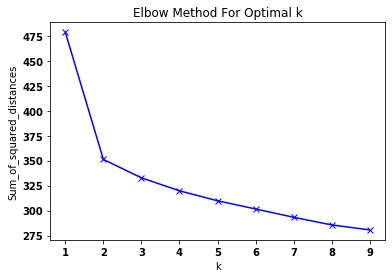

In [0]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [0]:
num_clusters = 2

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

the cluster centers are [[1.86493002e-02 4.43233066e-02 3.16218418e-02 3.96003631e-02
  2.88096610e-02 4.59649932e-02 2.88781312e-02 3.34086961e-02
  5.95229233e-02 5.85296344e-02 4.19738537e-02 6.83685268e-02
  4.94638194e-02 6.27974515e-02 3.86761953e-02 3.17522614e-02
  3.69912840e-02 3.37805479e-02 4.59469418e-02 2.84533567e-02
  4.97969684e-02 4.18274427e-02 3.27606266e-02 3.41202049e-02
  2.41958783e-02 9.89119368e-05 4.07494777e-02 4.65632799e-02
  2.93960230e-02 4.12358133e-02 4.28086880e-02 3.95007522e-02
  4.44941129e-02 4.74926036e-02 5.60060086e-02 3.32030792e-02
  4.06903441e-02 3.97225983e-02 7.38643173e-02 2.92279951e-02
  4.99901639e-02 3.25543095e-02 3.15586545e-02 6.42124829e-02
  8.90011597e-02 3.46763251e-02 3.60954245e-02 6.84705302e-02
  2.60386460e-02 2.97602701e-02 4.31098028e-02 3.57093020e-02
  2.92168768e-02 4.62787272e-02 3.64290953e-02 4.83572038e-02
  3.36945303e-02 3.59339903e-02 4.28656517e-02 4.48546708e-02
  9.44360239e-02 2.43191951e-02 4.34803158e-02

['doc_cluster_best_K.pkl']

In [0]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("\n")
    print("Top words in Cluster-%d :" % i, end='')
    print("\n")
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:


Top words in Cluster-0 :

['say'],['work'],['new'],['year'],['use'],['like'],['time'],['people'],['company'],['need'],['datum'],['change'],['code'],['user'],['know'],['way'],['system'],['support'],['try'],['look'],

Top words in Cluster-1 :

['website', 'give', 'access'],['website', 'give'],['give', 'access'],['website'],['access'],['give'],['help'],['free'],['get'],['go'],['good'],['great'],['happen'],['include'],['high'],['find'],['information'],['know'],['large'],['learn'],

Appending cluter to the data frame

In [0]:
data['cluster_group'] = clusters
pd.DataFrame(data).head(6)

,title,domain,url,date_created,num_upvotes,num_comments,posted_by_user,text,word_count,newtext,tokens,stopwordremoves,tokenize_and_stem,tokenize_and_lemmatize,cluster_group
0,Working with Azure Application Insights in You...,(react.christmas),https://react.christmas/2019/11,2 minutes ago,1 point,discuss,selbekk,a minute read written bysondre widmark and mar...,781,"(a, minute, read, written, bysondre, widmark, ...",a minute read written bysondre widmark and mar...,None,minut read written bysondr widmark mari buøen ...,minute read write bysondre widmark marie buøen...,0
1,A universal tech code of conduct (parkersoftwa...,(parkersoftware.com),https://www.parkersoftware.com/blog/a-universa...,3 minutes ago,3 points,discuss,roxyabercrombie,don t make technical assumptions don t back se...,757,"(don, t, make, technical, assumptions, don, t,...",don t make technical assumptions don t back se...,None,don t technic assumpt don t seat develop don t...,don t technical assumption don t seat develop ...,0
2,Scolp: Streaming Column Printer for Python (Ne...,(github.com),https://github.com/davidohana/python-scolp,4 minutes ago,1 point,discuss,davidoh,github is home to over million developers work...,337,"(github, is, home, to, over, million, develope...",github is home to over million developers work...,None,github home million develop work host review c...,github home million developer work host review...,0
3,Thinking in React Hooks (wattenberger.com),(wattenberger.com),https://wattenberger.com/blog/react-hooks,5 minutes ago,1 point,discuss,mariuz,,1,(),,None,,,0
4,Startup School Winter 2020 (ycombinator.com),(ycombinator.com),https://blog.ycombinator.com/announcing-startu...,7 minutes ago,2 points,discuss,bithavoc,website is not giving access,5,"(website, is, not, giving, access)",website is not giving access,None,websit give access,website give access,1
5,"Lovers in Auschwitz, Reunited 72 Years Later. ...",(nytimes.com),https://www.nytimes.com/2019/12/08/nyregion/au...,7 minutes ago,1 point,discuss,kevinwang,was she the reason he was alive today david wi...,3357,"(was, she, the, reason, he, was, alive, today,...",was she the reason he was alive today david wi...,None,reason aliv today david wisnia home pennsylvan...,reason alive today david wisnia home pennsylva...,0


In [0]:
cluster_df = pd.DataFrame(data)
cluster_df['cluster_group'].value_counts()

0    485
1    145
Name: cluster_group, dtype: int64